In [41]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [42]:
# Set the number of observations
num_observations = 200

# Define the parameters for the distributions
x_mean, x_std = 10, 2
u_mean, u_std = 0, 8

# Generate random numbers from the normal distributions
x_values = np.random.normal(x_mean, x_std, num_observations)
u_values = np.random.normal(u_mean, u_std, num_observations)

# Calculate y values using the given formula
y_values = -30 + 3 * x_values + u_values

In [43]:
# Split the data into training and test sets
train_size = int(num_observations * 0.5)
x_train = x_values[:train_size]
y_train = y_values[:train_size]
x_test = x_values[train_size:]
y_test = y_values[train_size:]

# Add a constant term to the x_train and x_test
x_train_const = sm.add_constant(x_train)
x_test_const = sm.add_constant(x_test)

In [44]:
# Run the OLS regression on the training set
model = sm.OLS(y_train, x_train_const)
results = model.fit()

In [45]:
# Estimate the Y values for the test set using the estimated model
y_estimated_test = results.predict(x_test_const)

# Calculate the 95% confidence intervals and prediction intervals for the predicted values in the test set
prediction_results_test = results.get_prediction(x_test_const)
summary_frame_test = prediction_results_test.summary_frame(alpha=0.05)

conf_int_test = summary_frame_test[['mean_ci_lower', 'mean_ci_upper']].values
pred_int_test = summary_frame_test[['obs_ci_lower', 'obs_ci_upper']].values

In [48]:
# Determine the Y-axis limits
y_min = min(np.min(y_train), np.min(conf_int_test), np.min(pred_int_test))
y_max = max(np.max(y_train), np.max(conf_int_test), np.max(pred_int_test))

# Create a function to plot different graphs
def plot_graph(graph_num, title, plot_regression_line=False, plot_conf_int=False, plot_pred_int=False):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label='Training Set Observations', alpha=0.6)
    plt.plot(x_values, -30 + 3 * x_values, 'g-', label='True conditional expectation function')
    
    if plot_regression_line:
        plt.plot(x_test, y_estimated_test, 'r-', label='Estimated regression line (Test Set)')
    if plot_conf_int:
        plt.scatter(x_test, conf_int_test[:, 0], color='gray', marker='o', s=20, label='95% Confidence Interval Lower Bound (Test Set)')
        plt.scatter(x_test, conf_int_test[:, 1], color='gray', marker='o', s=20, label='95% Confidence Interval Upper Bound (Test Set)')
    if plot_pred_int:
        plt.scatter(x_test, pred_int_test[:, 0], color='blue', marker='o', s=20, label='95% Prediction Interval Lower Bound (Test Set)')
        plt.scatter(x_test, pred_int_test[:, 1], color='blue', marker='o', s=20, label='95% Prediction Interval Upper Bound (Test Set)')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt

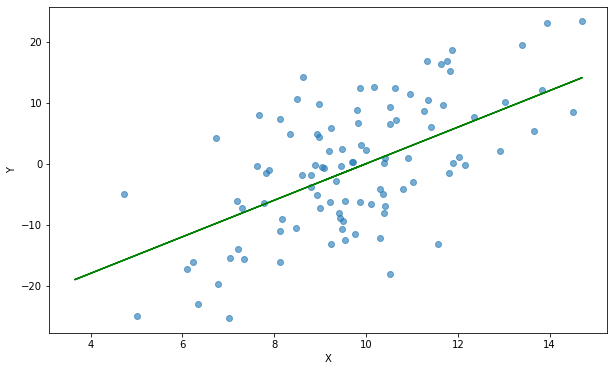

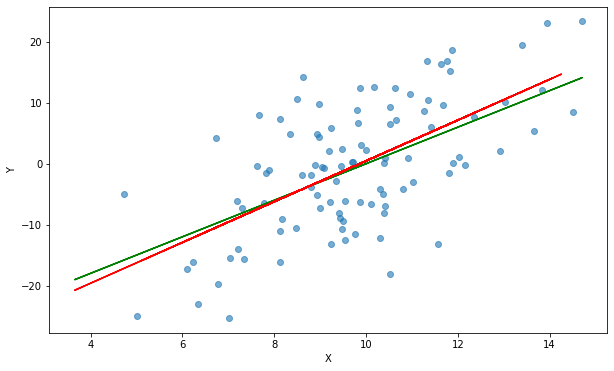

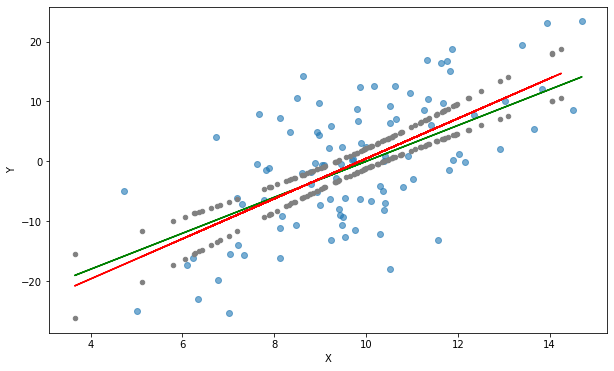

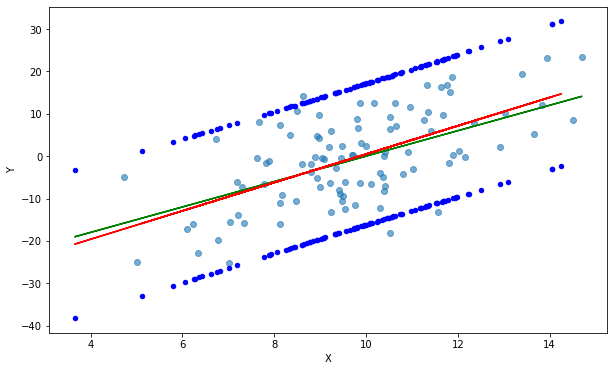

In [49]:
# Plot the four different graphs
plot_graph(1, 'Conditional Expectation Function')
plot_graph(2, 'Conditional Expectation Function and Regression Line', plot_regression_line=True)
plot_graph(3, 'Conditional Expectation Function, Regression Line, and Confidence Intervals', plot_regression_line=True, plot_conf_int=True)
plot_graph(4, 'Conditional Expectation Function, Regression Line, and Prediction Intervals', plot_regression_line=True, plot_pred_int=True)